# Autoregressive moving average

## Install packages

In [1]:
import sys
!{sys.executable} -m pip install -r requirements.txt

    100% |████████████████████████████████| 7.4MB 3.8MB/s eta 0:00:01    20% |██████▍                         | 1.5MB 24.1MB/s eta 0:00:01
    100% |████████████████████████████████| 12.2MB 2.4MB/s eta 0:00:01
    100% |████████████████████████████████| 26.2MB 1.2MB/s eta 0:00:01    45% |██████████████▌                 | 11.9MB 36.2MB/s eta 0:00:01
    100% |████████████████████████████████| 1.1MB 18.3MB/s ta 0:00:01
    100% |████████████████████████████████| 50.0MB 635kB/s eta 0:00:01  4% |█▌                              | 2.4MB 38.6MB/s eta 0:00:02    40% |████████████▉                   | 20.0MB 40.9MB/s eta 0:00:01    57% |██████████████████▍             | 28.8MB 32.7MB/s eta 0:00:01    67% |█████████████████████▌          | 33.7MB 45.2MB/s eta 0:00:01
    100% |████████████████████████████████| 215kB 21.1MB/s ta 0:00:01
  Running setup.py bdist_wheel for plotly ... done
  Stored in directory: /root/.cache/pip/wheels/98/54/81/dd92d5b0858fac680cd7bdb8800eb26c001dd9f5dc8b1bc0ba
Succ

In [2]:
import pandas as pd
import numpy as np
import os
from statsmodels.tsa.arima_model import ARMA
import matplotlib.pyplot as plt
import seaborn as sns
import quiz_tests

In [3]:
sns.set()
#note that for the figure size to show, this cell should be run
#separately from the import of pyplot
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (14, 8)

## Simulate return series with autoregressive properties

In [4]:
from statsmodels.tsa.arima_process import ArmaProcess
np.random.seed(200)

ar_params = np.array([1, -0.5])
ma_params = np.array([1, -0.3])
ret = ArmaProcess(ar_params, ma_params).generate_sample(nsample=5*252)

ret = pd.Series(ret)
drift = 100
price = pd.Series(np.cumsum(ret)) + drift

### log returns

In [5]:
lret = np.log(price) - np.log(price.shift(1))
lret = lret[1:]

## Quiz Solution: ARIMA

Fit an autoregressive integrated moving average model.  Choose an order of integration of 1, autoregresion lag of 1, and moving average lag of 1.

Check out the [stats model arima](http://www.statsmodels.org/0.6.1/generated/statsmodels.tsa.arima_model.ARMAResults.html) documentation to help you.

In [6]:
from statsmodels.tsa.arima_model import ARIMA

In [7]:
def fit_arima(lret):
    
    #TODO: choose autoregression lag of 1
    AR_lag_p = 1
    
    #TODO: choose moving average lag of 1
    MA_lag_q = 1
    
    #TODO: choose order of integration 1
    order_of_integration_d = 1
    
    #TODO: Create a tuple of p,d,q
    order = (AR_lag_p, order_of_integration_d, MA_lag_q)
    
    #TODO: create an ARIMA model object, passing in the values of the lret pandas series,
    # and the tuple containing the (p,d,q) order arguments
    arima_model = ARIMA(lret.values, order=order)
    arima_result = arima_model.fit()
    
    #TODO: from the result of calling ARIMA.fit(),
    # save and return the fitted values, autoregression parameters, and moving average parameters
    fittedvalues = arima_result.fittedvalues
    arparams = arima_result.arparams
    maparams = arima_result.maparams
   
    return fittedvalues,arparams,maparams

quiz_tests.test_fit_arima(fit_arima)

Tests Passed


fitted AR parameter 0.21, MA parameter -0.98


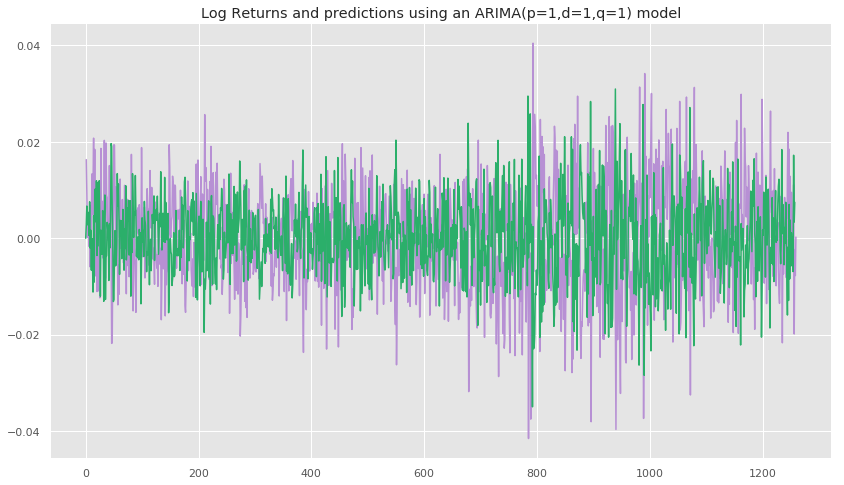

In [8]:
fittedvalues,arparams,maparams = fit_arima(lret)
arima_pred = pd.Series(fittedvalues)
plt.plot(lret, color=sns.xkcd_rgb["pale purple"])
plt.plot(arima_pred, color=sns.xkcd_rgb["jade green"])
plt.title('Log Returns and predictions using an ARIMA(p=1,d=1,q=1) model');
print(f"fitted AR parameter {arparams[0]:.2f}, MA parameter {maparams[0]:.2f}")